# Plot

In [19]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools

delphesDir = os.path.abspath("../MG5/Delphes")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT

ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

import sys
sys.path.append('../recastCode')
from helper import eventReader

plt.style.use('fivethirtyeight') #Set style
plt.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

colors = sns.color_palette('Paired')

### Load Recast Data

In [20]:
inputFile = '../pp2ZH/Events/run_01/ctau_1mm_delphes_events.root'
ctau = float(inputFile.split('ctau_')[1].split('mm')[0])

In [21]:
methods = ['smearD0','smearVtx']
Rvals = [None,102.0]
nevts = 5000
allResults = []
for method,R in itertools.product(methods,Rvals):
    print('Getting results for method = %s and Rmax = %s' %(method,R))
    f = ROOT.TFile(inputFile,'read')
    allResults.append(eventReader(f,nevts,method,R))
    f.Close()

            

Getting results for method = smearD0 and Rmax = None


/home/lessa/exoHiggsEJ/plotting/../recastCode/helper.py:174: RuntimeWarning: divide by zero encountered in log10
  ltheta = np.log10(theta)


Getting results for method = smearD0 and Rmax = 102.0
Getting results for method = smearVtx and Rmax = None
Getting results for method = smearVtx and Rmax = 102.0


### Plot Distributions

In [22]:
cmsIP2D = np.genfromtxt('../CMS_data/HEPData-ins1954276-v1-Figure_002-a.csv',skip_footer=99,skip_header=43,delimiter=',')
bins = cmsIP2D[:-1,0]-np.diff(cmsIP2D[:,0])/2

In [23]:
title = r'$c\tau_s = %1.0f$ mm' %(ctau)
colors = sns.color_palette('Paired')

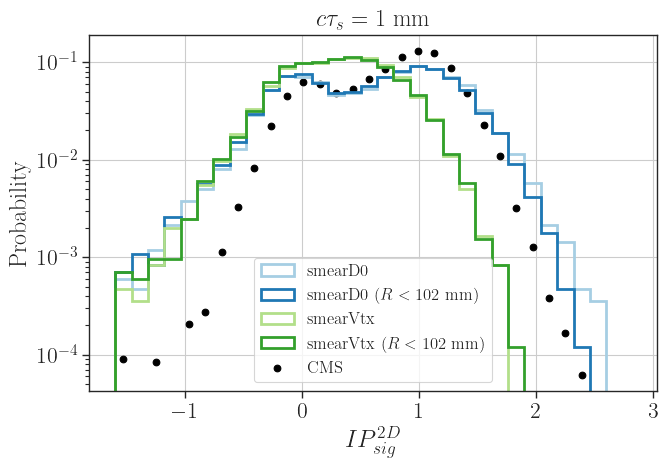

In [24]:
fig = plt.figure(figsize=(7,5))
for i,resDict in enumerate(allResults):
    IP2D = resDict['IP2D']
    label = '%s' %(resDict['method'])
    if resDict['Rmax'] is not None:
        label += r' ($R < %1.0f$ mm)' %resDict['Rmax']
    h1,_,_ = plt.hist(IP2D,histtype='step',linewidth=2,bins=bins,density=False,weights=[1.0/len(IP2D)]*len(IP2D),label=label,color=colors[i])
plt.scatter(cmsIP2D[:,0],cmsIP2D[:,1],label='CMS',color='black')
# np.savetxt('./ip2d_1mm.csv',list(zip(bins,h1)),header='bin,bin_content',delimiter=',',fmt='%1.4e')
plt.legend(fontsize=12)
plt.yscale('log')
# plt.ylim(1e-2,10)
# plt.xlim(-1.5,3.0)
plt.grid()
plt.xlabel(r'$IP_{sig}^{2D}$',fontsize=18)
plt.ylabel('Probability')
plt.title(title)

plt.tight_layout()
plt.savefig('IP2D_1mm.png')
plt.show()

In [25]:
cmsTheta2D = np.genfromtxt('../CMS_data/HEPData-ins1954276-v1-Figure_002-b.csv',skip_footer=78,skip_header=36,delimiter=',')
bins = cmsTheta2D[:-1,0]-np.diff(cmsTheta2D[:,0])/2

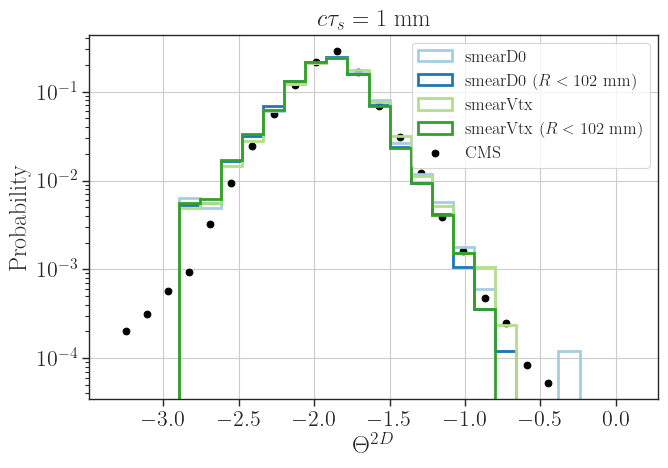

In [26]:
fig = plt.figure(figsize=(7,5))
for i,resDict in enumerate(allResults):
    theta2D = resDict['theta2D']
    label = '%s' %(resDict['method'])
    if resDict['Rmax'] is not None:
        label += r' ($R < %1.0f$ mm)' %resDict['Rmax']
    h1,_,_ = plt.hist(theta2D,histtype='step',linewidth=2,bins=bins,density=False,weights=[1.0/len(theta2D)]*len(theta2D),label=label,color=colors[i])
# np.savetxt('./theta2d_1mm.csv',list(zip(bins,h1)),header='bin,bin_content',delimiter=',',fmt='%1.4e')

plt.scatter(cmsTheta2D[:,0],cmsTheta2D[:,1],label='CMS',color='black')
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid()

plt.xlabel(r'$\Theta^{2D}$',fontsize=18)
plt.ylabel('Probability')
plt.title(title)
plt.tight_layout()
plt.savefig('Theta2D_1mm.png')
plt.show()

In [27]:
cmsAlpha = np.genfromtxt('../CMS_data/HEPData-ins1954276-v1-Figure_002-c.csv',skip_footer=153,skip_header=60,delimiter=',')
bins = cmsAlpha[:-1,0]-np.diff(cmsAlpha[:,0])/2
bins[0] = 0.0
bins = np.append(bins,cmsAlpha[-1,0]-np.diff(cmsAlpha[-2:,0])/2)
bins = np.append(bins,cmsAlpha[-1,0]+np.diff(cmsAlpha[-2:,0])/2)

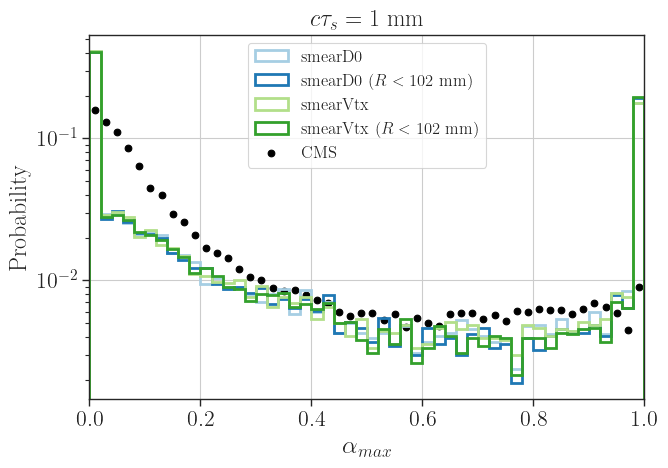

In [28]:
fig = plt.figure(figsize=(7,5))
for i,resDict in enumerate(allResults):
    alpha = resDict['alpha']
    label = '%s' %(resDict['method'])
    if resDict['Rmax'] is not None:
        label += r' ($R < %1.0f$ mm)' %resDict['Rmax']
    h1,_,_ = plt.hist(alpha,histtype='step',linewidth=2,bins=bins,density=False,weights=[1.0/len(alpha)]*len(alpha),label=label,color=colors[i])
# np.savetxt('./alpha_1mm.csv',list(zip(bins,h1)),header='bin,bin_content',delimiter=',',fmt='%1.4e')

plt.scatter(cmsAlpha[:,0],cmsAlpha[:,1],label='CMS',color='black')
plt.legend(fontsize=12)
plt.yscale('log')
# plt.ylim(1e-3,1e0)
plt.xlim(0.,1.)
plt.grid()

plt.xlabel(r'$\alpha_{max}$',fontsize=18)
plt.ylabel('Probability')
plt.title(title)

plt.tight_layout()
plt.savefig('alpha_1mm.png')
plt.show()

### Additional distributions

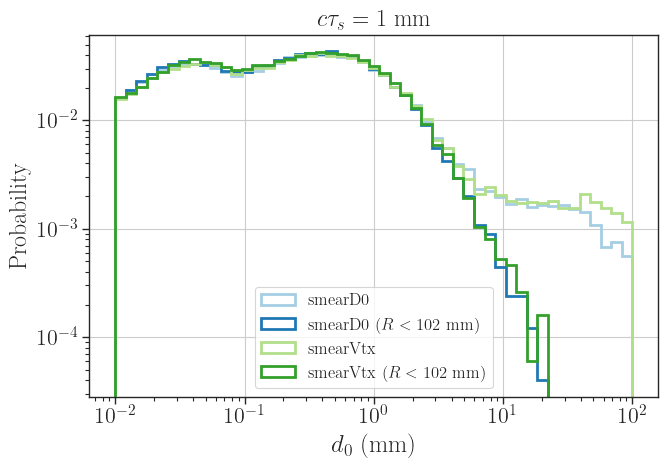

In [35]:
fig = plt.figure(figsize=(7,5))
bins = np.logspace(-2,2,50)
for i,resDict in enumerate(allResults):
    d0 = resDict['d0']
    label = '%s' %(resDict['method'])
    if resDict['Rmax'] is not None:
        label += r' ($R < %1.0f$ mm)' %resDict['Rmax']
    h1,_,_ = plt.hist(d0,histtype='step',linewidth=2,bins=bins,density=False,weights=[1.0/len(d0)]*len(d0),label=label,color=colors[i])

plt.legend(fontsize=12)
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-2,10)
# plt.xlim(-1.5,3.0)
plt.grid()

plt.xlabel(r'$d_{0}$ (mm)',fontsize=18)
plt.ylabel('Probability')
plt.title(title)

plt.tight_layout()
plt.savefig('d0_1mm.png')
plt.show()

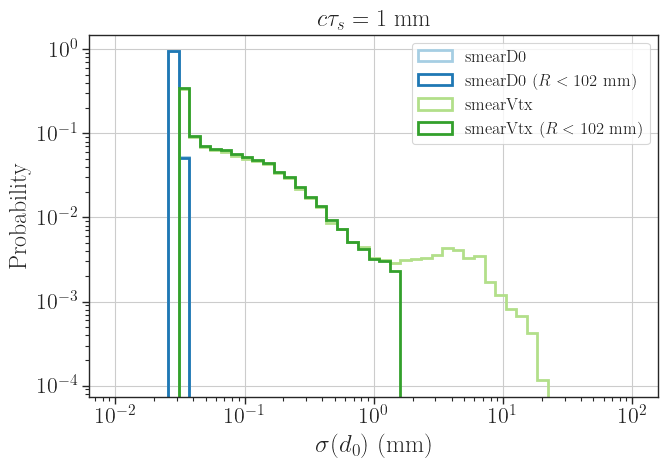

In [36]:
fig = plt.figure(figsize=(7,5))
bins = np.logspace(-2,2,50)
for i,resDict in enumerate(allResults):
    sigmaD0 = resDict['sigmaD0']
    label = '%s' %(resDict['method'])
    if resDict['Rmax'] is not None:
        label += r' ($R < %1.0f$ mm)' %resDict['Rmax']
    h1,_,_ = plt.hist(sigmaD0,histtype='step',linewidth=2,bins=bins,density=False,weights=[1.0/len(sigmaD0)]*len(sigmaD0),label=label,color=colors[i])

plt.legend(fontsize=12)
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-2,10)
# plt.xlim(-1.5,3.0)
plt.grid()

plt.xlabel(r'$\sigma(d_{0})$ (mm)',fontsize=18)
plt.ylabel('Probability')
plt.title(title)

plt.tight_layout()
plt.savefig('sigmaD0_1mm.png')
plt.show()

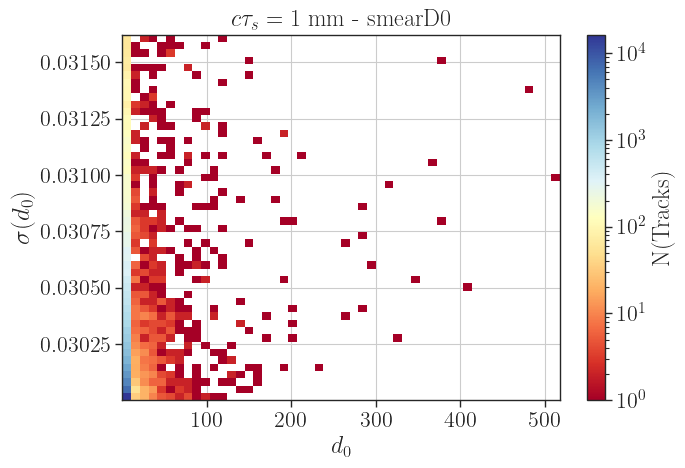

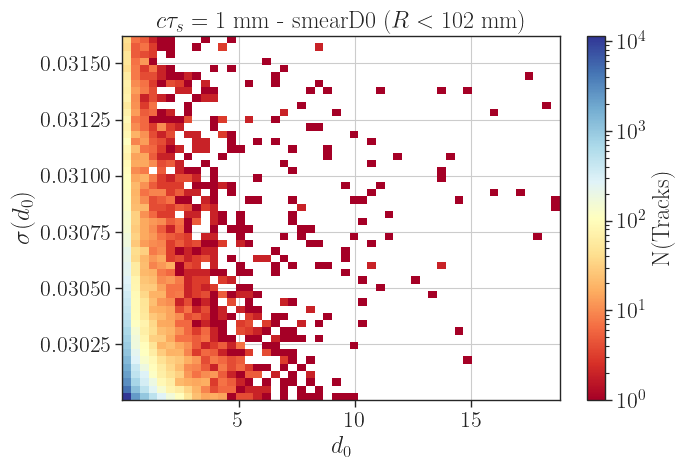

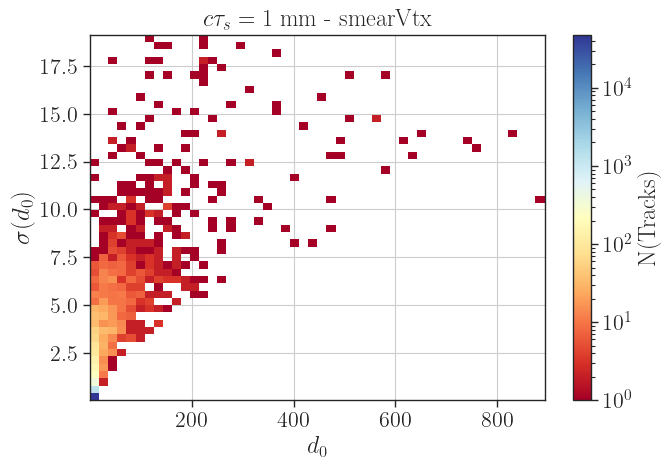

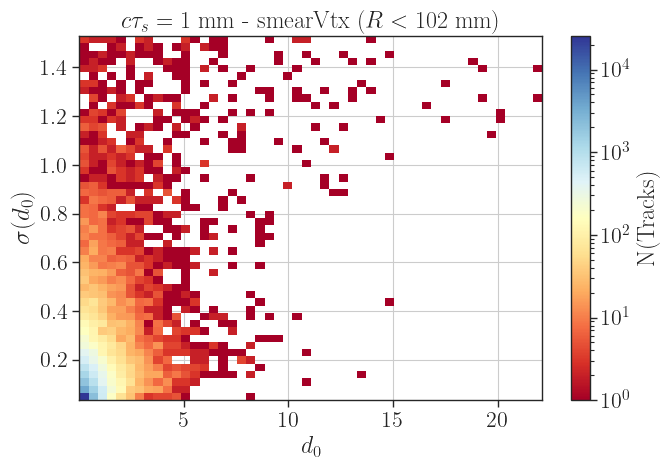

In [31]:
for resDict in allResults:
    sigmaD0 = resDict['sigmaD0']
    d0 = resDict['d0']
    label = '%s' %(resDict['method'])
    if resDict['Rmax'] is not None:
        label += r' ($R < %1.0f$ mm)' %resDict['Rmax']
    
    fig = plt.figure(figsize=(7,5))
    plt.hist2d(d0,sigmaD0,bins=50,norm=LogNorm(),cmap=cm)
    plt.grid()
    plt.ylabel(r'$\sigma(d_{0})$',fontsize=18)
    plt.xlabel(r'$d_0$')
    plt.title(title + ' - ' + label)
    plt.colorbar(label='N(Tracks)')
    plt.tight_layout()
    plt.show()